In [112]:
%matplotlib inline
import astropy.io.fits
import numpy as np
import matplotlib.pyplot as plt
fits = astropy.io.fits.open("../../data/HSC_grizy_example.fits")
table = fits[1].data

In [113]:
def getMagnitudes(table, band_column, magzero=27.0):
    """
    Get magnitude for each band from flux as dict.
    With excluding NaN flux data.
    """
    ans = {}
    count = 0 
    for band, column in band_column.items():
        flux = table[column]
        if count == 0:
            mask_0 = flux > 0.0
            mask = np.isfinite(table[column]) & mask_0
            count = 1
        elif count == 1:
            mask_0 = flux > 0.0
            mask = np.logical_and(mask, np.isfinite(table[column])) & mask_0
    for band, column in band_column.items():
        flux = table[column]
        magnitude = -2.5 * np.log10(flux[mask]) + magzero
        ans.update({band: magnitude})
    return ans

In [114]:
data_KRON = getMagnitudes(table, {"r": "R_FLUX_KRON", "i": "I_FLUX_KRON", "g": "G_FLUX_KRON", "z": "Z_FLUX_KRON"})

/Users/rmurata/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater
/Users/rmurata/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


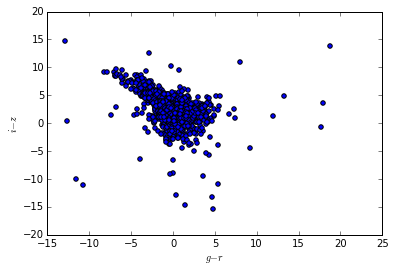

In [115]:
x = data_KRON['g'] - data_KRON['r']
y = data_KRON['i'] - data_KRON['z']
plt.xlabel(r'$g-r$')
plt.ylabel(r'$i-z$')
plt.scatter(x, y)
plt.show()

In [116]:
data_PSF = getMagnitudes(table, {"r": "R_FLUX_PSF", "i": "I_FLUX_PSF", "g": "G_FLUX_PSF", "z": "Z_FLUX_PSF"})

/Users/rmurata/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater
/Users/rmurata/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


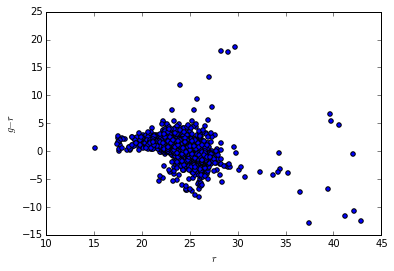

In [117]:
y = data_KRON['g'] - data_KRON['r']
x = data_KRON['r']
plt.xlabel(r'$r$')
plt.ylabel(r'$g-r$')
plt.scatter(x, y)
plt.show()

In [118]:
data_PSF_all = getMagnitudes(table, {"r": "R_FLUX_PSF", "i": "I_FLUX_PSF", "g": "G_FLUX_PSF", "z": "Z_FLUX_PSF", "y": "Y_FLUX_PSF"})

/Users/rmurata/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater
/Users/rmurata/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


In [119]:
data_PSF_all

{'g': array([ 21.81033671,  25.51979728,  22.45434299, ...,  26.39674975,
         23.54520052,  27.71902653]),
 'i': array([ 21.5791084 ,  25.3079966 ,  21.78367271, ...,  26.33730777,
         23.21964055,  27.54459348]),
 'r': array([ 20.79361522,  24.70992439,  21.30049802, ...,  25.68832423,
         21.84675622,  25.24393065]),
 'y': array([ 20.27914128,  24.04895021,  20.96224524, ...,  25.09556648,
         21.4333949 ,  23.93997693]),
 'z': array([ 20.60682583,  24.24085981,  21.02507975, ...,  27.10976963,
         21.54241111,  24.42693483])}

In [120]:
bands = ['r', 'i', 'g', 'z', 'y']
band1 = []
band2 = []
for i in range(5):
    for j in range(5):
        if (i < j):
            band1.append(bands[i])
            band2.append(bands[j])
print band1
print band2

['r', 'r', 'r', 'r', 'i', 'i', 'i', 'g', 'g', 'z']
['i', 'g', 'z', 'y', 'g', 'z', 'y', 'z', 'y', 'y']


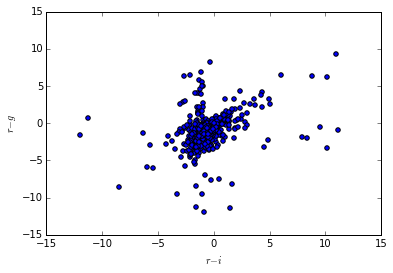

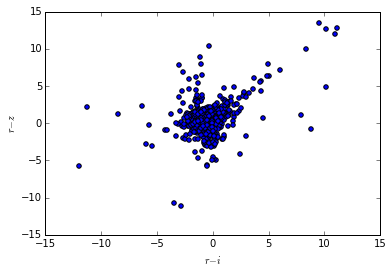

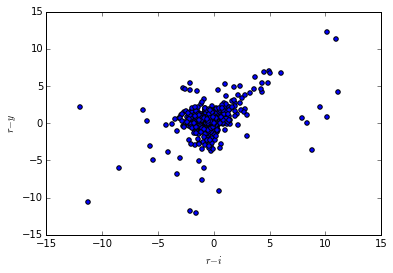

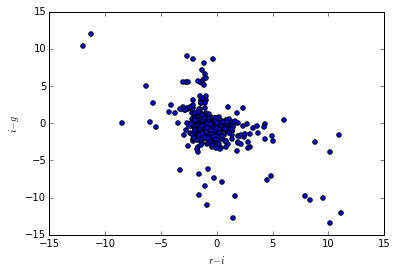

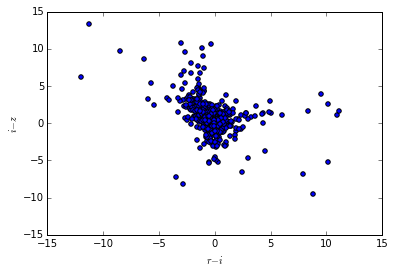

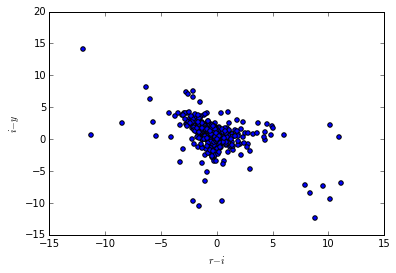

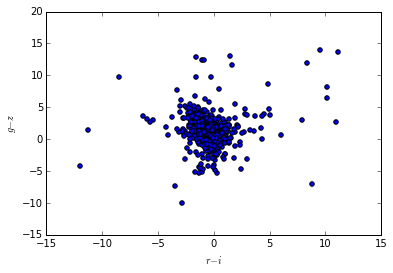

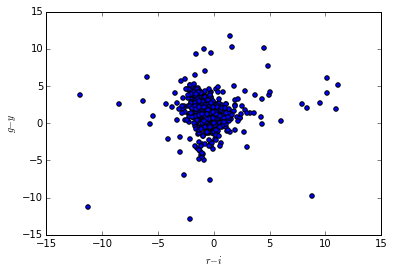

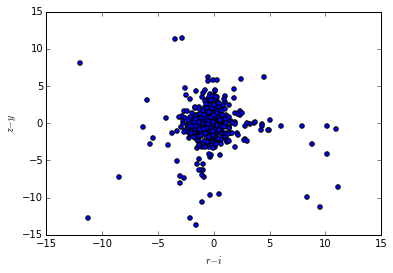

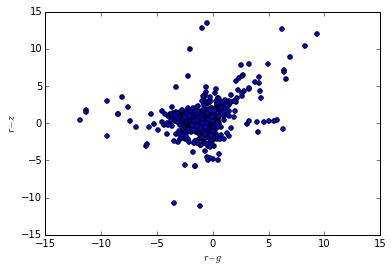

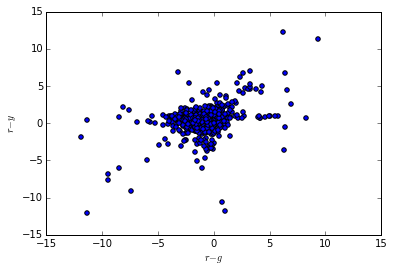

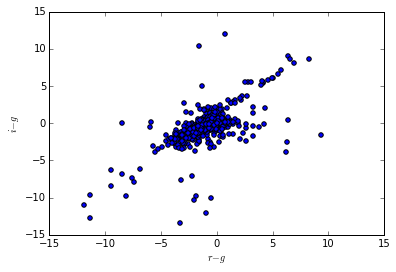

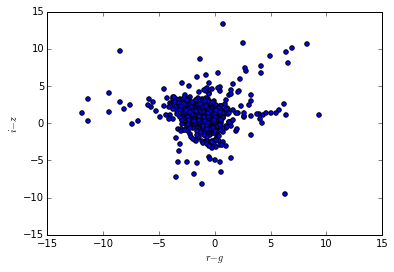

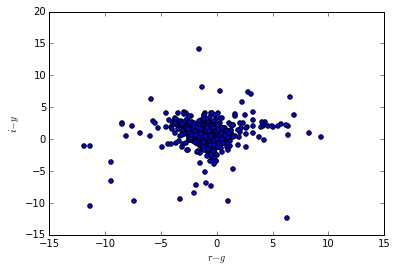

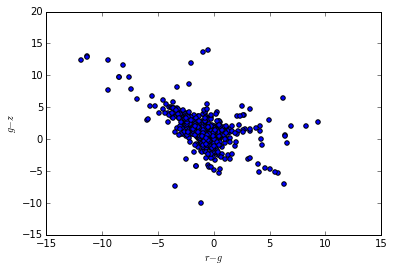

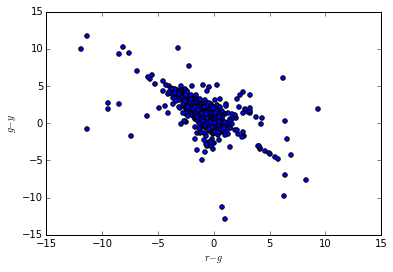

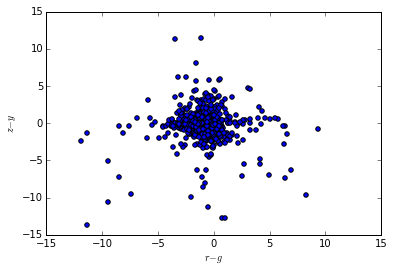

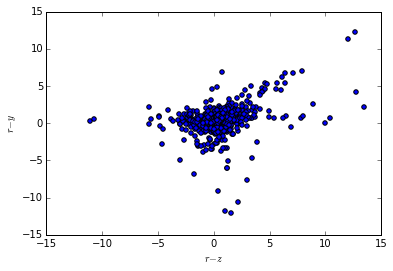

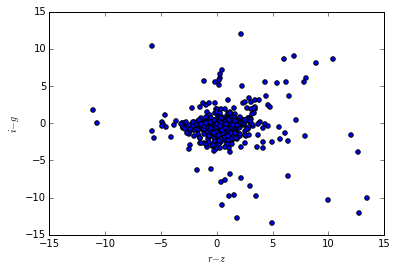

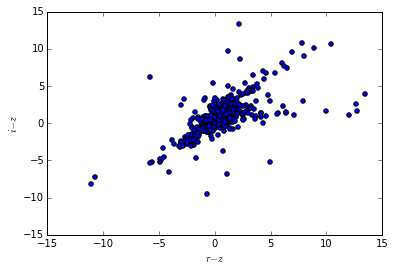

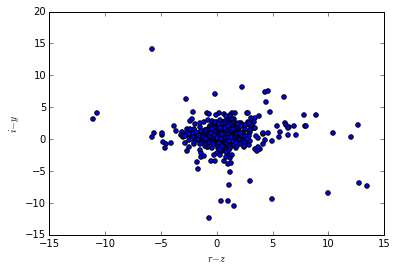

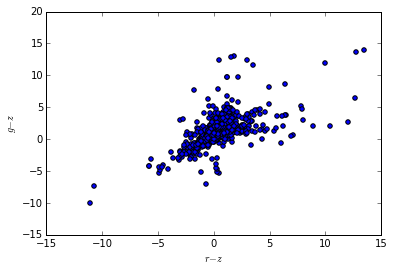

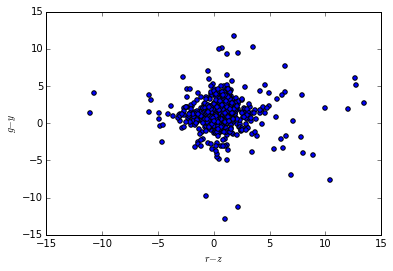

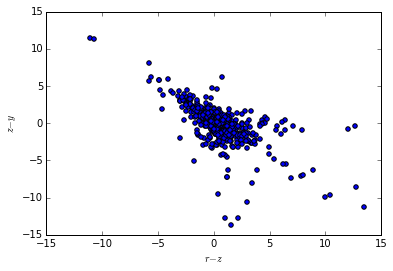

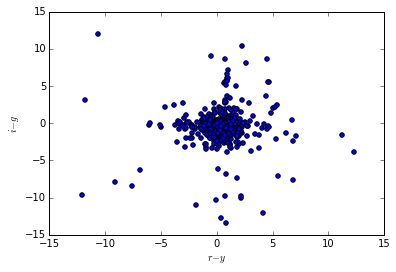

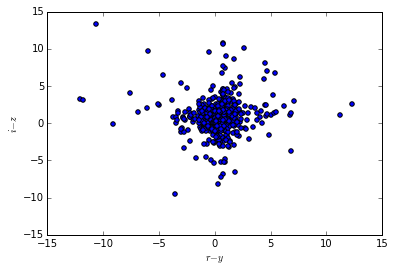

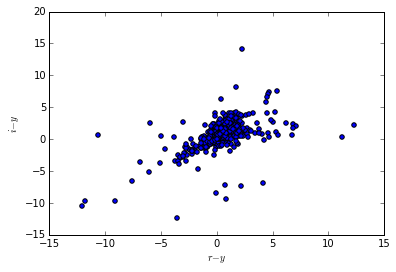

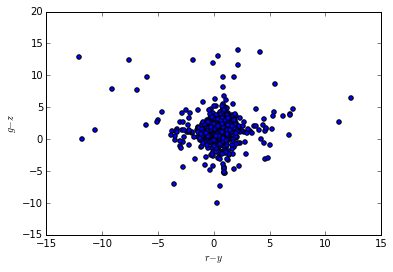

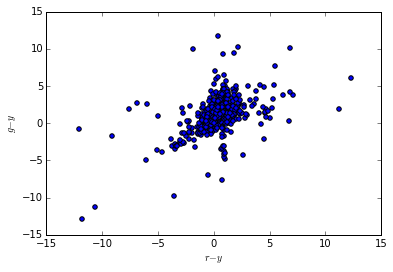

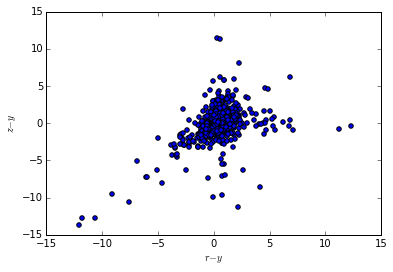

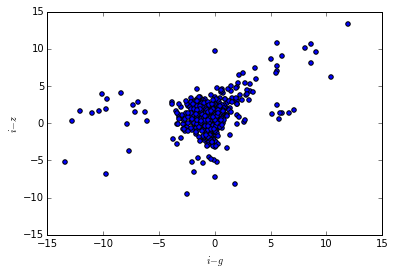

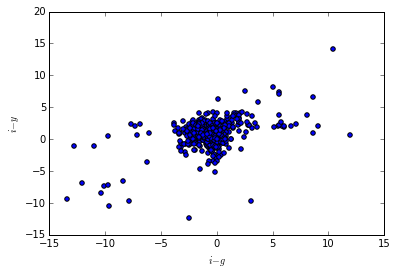

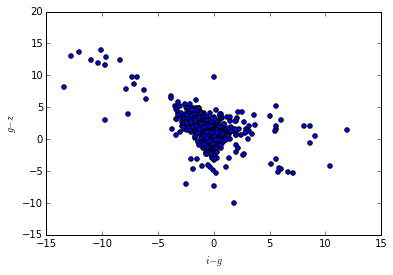

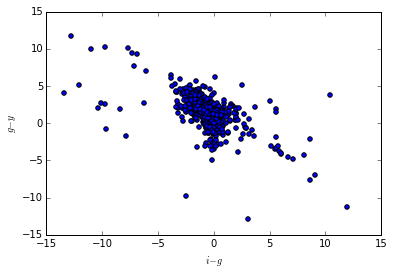

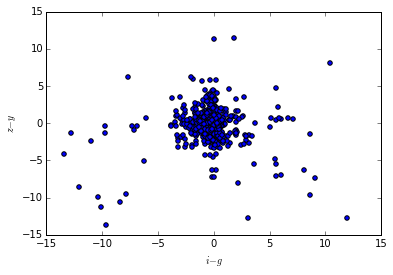

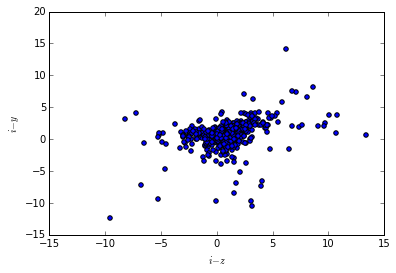

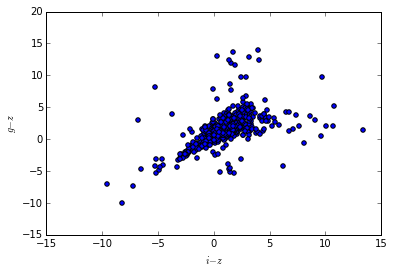

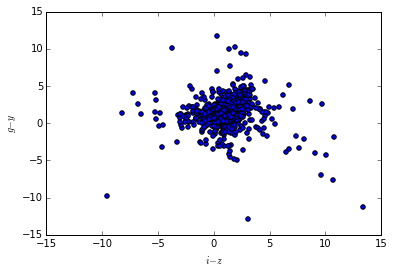

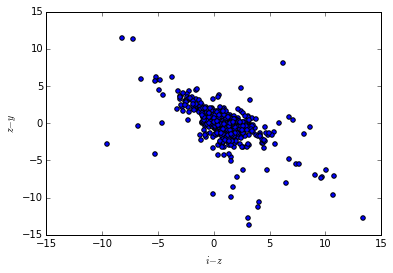

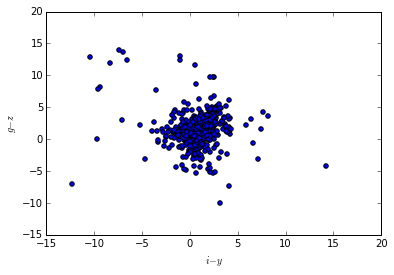

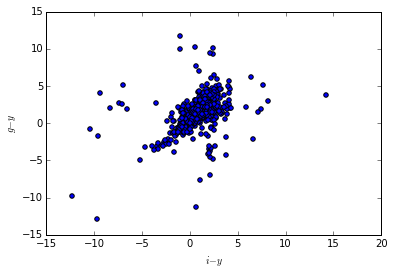

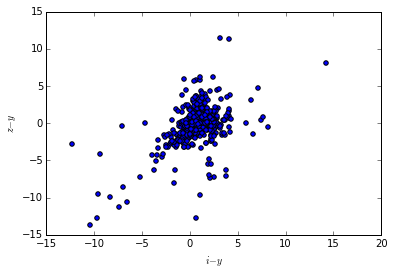

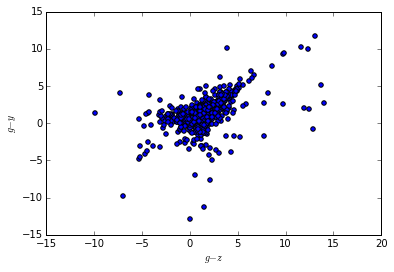

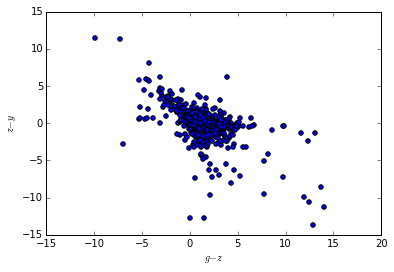

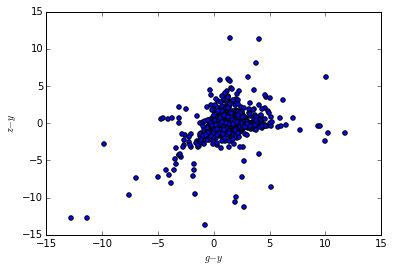

45


In [107]:
count = 0
for i in range(len(band1)):
    for j in range(len(band2)):
        if i < j:
            x = data_PSF_all[band1[i]] - data_PSF_all[band2[i]]
            y = data_PSF_all[band1[j]] - data_PSF_all[band2[j]]
            plt.scatter(x, y)
            plt.xlabel(r'${} - {}$'.format(band1[i], band2[i]))
            plt.ylabel(r'${} - {}$'.format(band1[j], band2[j]))
            plt.show()
            count += 1
print count
